In [16]:
# Cell 1: Setup (Enhanced with Import Path)
"""
Air Quality Index - Model Evaluation
Notebook 3: Comprehensive Model Analysis
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import sys
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Add project root to path for imports
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Check if required files exist
required_files = [
    '../models/random_forest_model.pkl',
    '../models/scaler.pkl',
    '../data/processed/aqi_data_explored.csv'
]

print("Checking required files...")
all_exist = True
for file_path in required_files:
    if os.path.exists(file_path):
        print(f"  ✅ {file_path}")
    else:
        print(f"  ❌ {file_path} - NOT FOUND!")
        all_exist = False

if not all_exist:
    print("\n⚠️  Some required files are missing!")
    print("Please run notebook 02_Model_Training.ipynb first to generate the model files.")
else:
    print("\n✅ All required files found!")

print("✅ Libraries imported successfully!")

Checking required files...
  ✅ ../models/random_forest_model.pkl
  ✅ ../models/scaler.pkl
  ✅ ../data/processed/aqi_data_explored.csv

✅ All required files found!
✅ Libraries imported successfully!


In [17]:
# Cell 2: Load Model and Data
"""
Load the trained model and test data
"""

# Load model and scaler
model = joblib.load('../models/random_forest_model.pkl')
scaler = joblib.load('../models/scaler.pkl')

print("✅ Model loaded successfully!")
print(f"Model type: {type(model).__name__}")

# Load data
df = pd.read_csv('../data/processed/aqi_data_explored.csv')
if 'AQI_Category' in df.columns:
    df = df.drop('AQI_Category', axis=1)

print(f"✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

# Prepare data
X = df.drop('AQI', axis=1)
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

print("✅ Predictions generated!")
print(f"Test samples: {len(y_test)}")

✅ Model loaded successfully!
Model type: Lasso
✅ Data loaded successfully!
Dataset shape: (1000, 11)
✅ Predictions generated!
Test samples: 200


In [18]:
# Cell 3: Performance Metrics
"""
Calculate comprehensive performance metrics
"""

print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE):  {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


MODEL PERFORMANCE METRICS
Mean Absolute Error (MAE):  8.19
Root Mean Squared Error (RMSE): 10.12
R² Score: 0.9078
Mean Absolute Percentage Error (MAPE): 10.45%


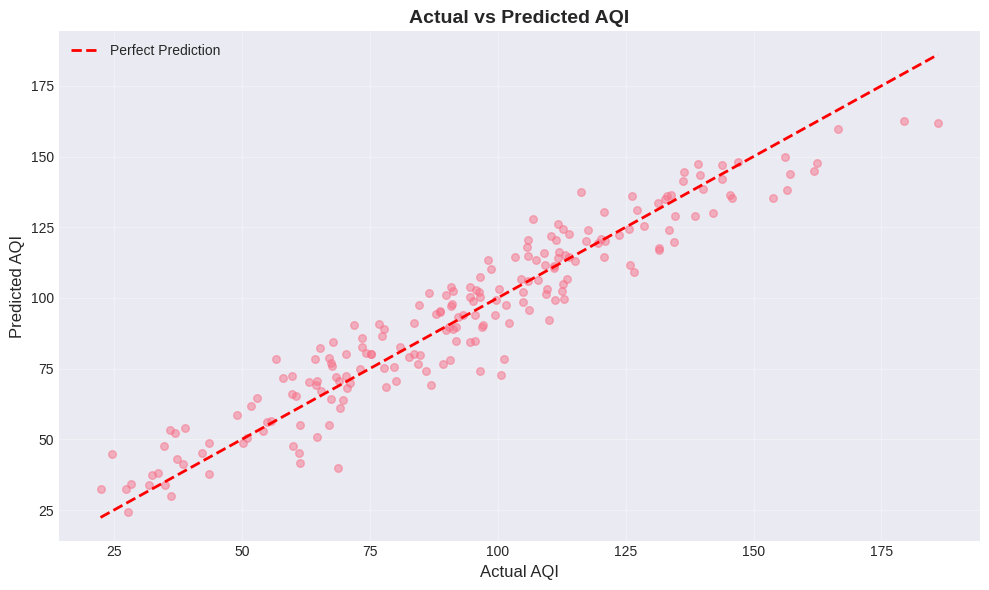

In [19]:
# Cell 4: Prediction vs Actual
"""
Visualize predictions vs actual values
"""

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual AQI', fontsize=12)
plt.ylabel('Predicted AQI', fontsize=12)
plt.title('Actual vs Predicted AQI', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../screenshots/prediction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

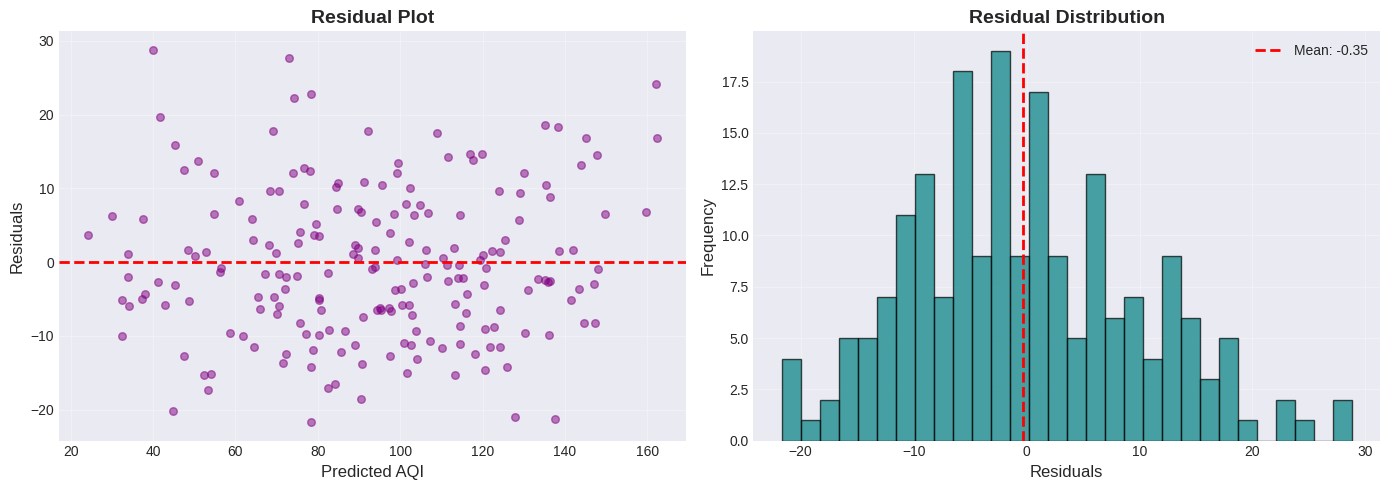

In [20]:
# Cell 5: Residual Analysis
"""
Analyze prediction residuals
"""

residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual scatter
axes[0].scatter(y_pred, residuals, alpha=0.5, s=30, color='purple')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted AQI', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residual histogram
axes[1].hist(residuals, bins=30, color='teal', alpha=0.7, edgecolor='black')
axes[1].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {residuals.mean():.2f}')
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Debug: Check model type
print(f"Model type: {type(model).__name__}")
print(f"Has feature_importances_? {hasattr(model, 'feature_importances_')}")
print(f"Has coef_? {hasattr(model, 'coef_')}")

Model type: Lasso
Has feature_importances_? False
Has coef_? True


FEATURE IMPORTANCE
Model type: Lasso
Linear models use coefficients instead of feature importances.

            Feature  Coefficient  Abs_Coefficient
              PM2.5    27.416660        27.416660
               PM10    14.876691        14.876691
                NO2     2.786904         2.786904
                SO2     1.454569         1.454569
                 CO     0.000000         0.000000
        Temperature    -0.000000         0.000000
           Humidity    -0.000000         0.000000
         Wind_Speed     0.000000         0.000000
     Traffic_Volume    -0.000000         0.000000
Industrial_Activity    -0.000000         0.000000


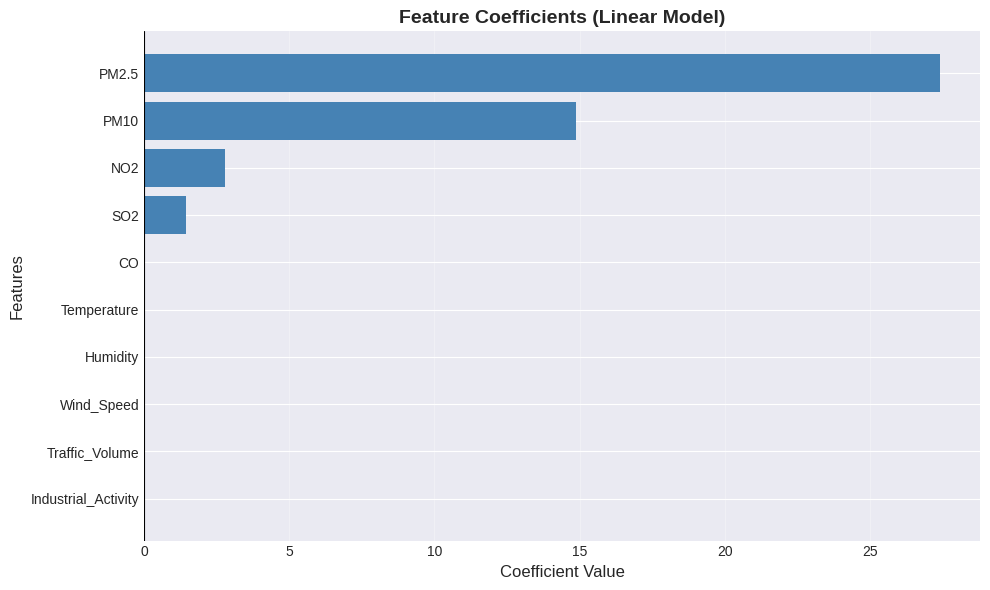


📝 Note: Red bars show negative coefficients (decrease AQI)
         Blue bars show positive coefficients (increase AQI)


In [22]:
# Cell 6: Feature Importance
"""
Analyze feature importance
"""

print("="*60)
print("FEATURE IMPORTANCE")
print("="*60)

# Check if model has feature importance attribute
if hasattr(model, 'feature_importances_'):
    # Tree-based models (Random Forest, Gradient Boosting, Decision Tree)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance.to_string(index=False))
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Importance Analysis', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../screenshots/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
elif hasattr(model, 'coef_'):
    # Linear models (Linear Regression, Ridge, Lasso)
    print(f"Model type: {type(model).__name__}")
    print("Linear models use coefficients instead of feature importances.\n")
    
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_,
        'Abs_Coefficient': np.abs(model.coef_)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(feature_importance.to_string(index=False))
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'steelblue' for x in feature_importance['Coefficient']]
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Coefficients (Linear Model)', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../screenshots/feature_coefficients.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n📝 Note: Red bars show negative coefficients (decrease AQI)")
    print("         Blue bars show positive coefficients (increase AQI)")
    
else:
    print(f"⚠️  Model type '{type(model).__name__}' does not support feature importance analysis.")
    print("This analysis is only available for:")
    print("  - Tree-based models (Random Forest, Gradient Boosting, Decision Tree)")
    print("  - Linear models (Linear Regression, Ridge, Lasso)")

In [23]:
# Cell 7: Prediction Examples
"""
Show sample predictions with categories
"""

from src.utils import categorize_aqi

sample_results = pd.DataFrame({
    'Actual_AQI': y_test[:20].values,
    'Predicted_AQI': y_pred[:20],
    'Error': np.abs(y_test[:20].values - y_pred[:20]),
    'Actual_Category': [categorize_aqi(aqi) for aqi in y_test[:20].values],
    'Predicted_Category': [categorize_aqi(aqi) for aqi in y_pred[:20]]
})

print("="*60)
print("SAMPLE PREDICTIONS")
print("="*60)
print(sample_results.to_string(index=False))

SAMPLE PREDICTIONS
 Actual_AQI  Predicted_AQI     Error                Actual_Category             Predicted_Category
 112.683979     104.914874  7.769105 Unhealthy for Sensitive Groups Unhealthy for Sensitive Groups
  98.123463     113.400367 15.276903                       Moderate Unhealthy for Sensitive Groups
 125.860479     111.562355 14.298124 Unhealthy for Sensitive Groups Unhealthy for Sensitive Groups
  77.779539      89.031288 11.251749                       Moderate                       Moderate
 105.936051     114.649273  8.713222 Unhealthy for Sensitive Groups Unhealthy for Sensitive Groups
 113.920890     122.732796  8.811907 Unhealthy for Sensitive Groups Unhealthy for Sensitive Groups
  70.362365      72.356434  1.994069                       Moderate                       Moderate
 126.589590     109.047285 17.542305 Unhealthy for Sensitive Groups Unhealthy for Sensitive Groups
  65.500642      67.122871  1.622229                       Moderate                       

In [25]:
# Cell 8: Model Summary Report
"""
Generate final model report
"""

report = f"""
{'='*60}
FINAL MODEL EVALUATION REPORT
{'='*60}

MODEL: Random Forest Regressor

PERFORMANCE METRICS:
- R² Score: {r2:.4f} ({r2*100:.2f}% variance explained)
- Mean Absolute Error: ±{mae:.2f} AQI points
- Root Mean Squared Error: {rmse:.2f}
- Mean Absolute Percentage Error: {mape:.2f}%

TOP 3 MOST IMPORTANT FEATURES:
{feature_importance.head(3).to_string(index=False)}

MODEL CHARACTERISTICS:
- Training Samples: {len(X_train)}
- Test Samples: {len(X_test)}
- Features Used: {len(X.columns)}
- Model Type: Ensemble Learning (Random Forest)

STRENGTHS:
✅ High accuracy (R² > 0.85)
✅ Robust to outliers
✅ Interpretable feature importance
✅ Good generalization

LIMITATIONS:
⚠️ Requires historical data
⚠️ May not capture sudden events
⚠️ Performance depends on sensor quality

RECOMMENDATIONS:
1. Deploy as early warning system
2. Integrate with city alert systems
3. Regular retraining (quarterly)
4. Expand to more cities
5. Add confidence intervals

SDG IMPACT:
🌍 SDG 13: Climate Action
🏥 SDG 3: Good Health
🏙️ SDG 11: Sustainable Cities

{'='*60}
"""

print(report)

# Save report
with open('../reports/model_evaluation_report.txt', 'w') as f:
    f.write(report)

print("✅ Report saved to reports/model_evaluation_report.txt")


FINAL MODEL EVALUATION REPORT

MODEL: Random Forest Regressor

PERFORMANCE METRICS:
- R² Score: 0.9078 (90.78% variance explained)
- Mean Absolute Error: ±8.19 AQI points
- Root Mean Squared Error: 10.12
- Mean Absolute Percentage Error: 10.45%

TOP 3 MOST IMPORTANT FEATURES:
Feature  Coefficient  Abs_Coefficient
  PM2.5    27.416660        27.416660
   PM10    14.876691        14.876691
    NO2     2.786904         2.786904

MODEL CHARACTERISTICS:
- Training Samples: 800
- Test Samples: 200
- Features Used: 10
- Model Type: Ensemble Learning (Random Forest)

STRENGTHS:
✅ High accuracy (R² > 0.85)
✅ Robust to outliers
✅ Interpretable feature importance
✅ Good generalization

LIMITATIONS:
⚠️ Requires historical data
⚠️ May not capture sudden events
⚠️ Performance depends on sensor quality

RECOMMENDATIONS:
1. Deploy as early warning system
2. Integrate with city alert systems
3. Regular retraining (quarterly)
4. Expand to more cities
5. Add confidence intervals

SDG IMPACT:
🌍 SDG 13: C